# Анализ причин оттока клиентов. 

Банк обратился за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы выяснить основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

### Описание данных

![Снимок экрана 2025-01-16 в 21.29.46.png](<attachment:Снимок экрана 2025-01-16 в 21.29.46.png>)
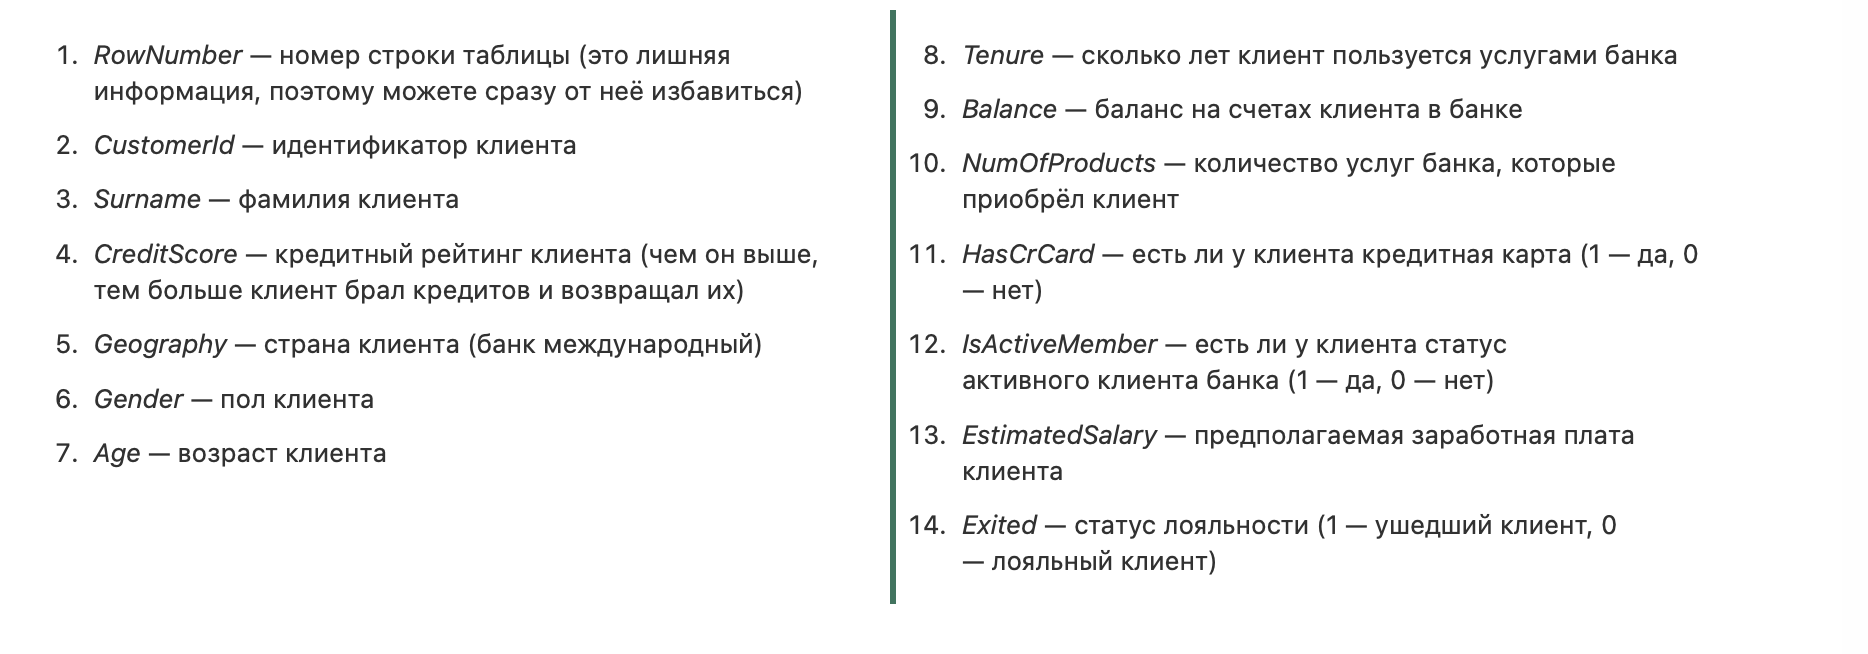

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.express as px


In [212]:
df = pd.read_csv('/Users/ulabakulina/Desktop/piton/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [214]:
df.drop('RowNumber', inplace=True, axis=1)

In [215]:
df['Exited']=df['Exited'].astype('category')
df['Exited']=df['Exited'].cat.rename_categories(["Лояльные","Ушедшие"])

In [216]:
df['IsActiveMember']=df['IsActiveMember'].astype('category')
df['IsActiveMember']=df['IsActiveMember'].cat.rename_categories(["Неактивные","Активные"])

In [217]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Активные,101348.88,Ушедшие
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активные,112542.58,Лояльные
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивные,113931.57,Ушедшие
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,Неактивные,93826.63,Лояльные
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активные,79084.10,Лояльные


### Посмотреть соотношение ушедших и лояльных клиентов, визуализировать на графике. 

In [218]:
df.Exited.value_counts()

Exited
Лояльные    7963
Ушедшие     2037
Name: count, dtype: int64

In [219]:
cd_exited=df.Exited.value_counts()

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/2109026578.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


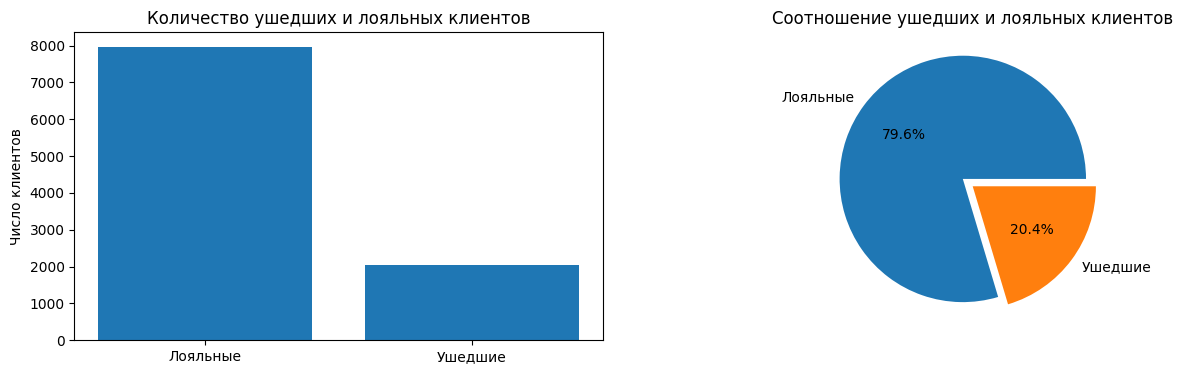

In [220]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=cd_exited.index,
    height=cd_exited,
)
axes[0].set_title("Количество ушедших и лояльных клиентов")
axes[0].set_ylabel('Число клиентов')

# линейный график
axes[1].pie(
    cd_exited,
    autopct='%.1f%%',
    explode = [0.1, 0], normalize=True,
    labels=cd_exited.index
)
axes[1].set_title("Соотношение ушедших и лояльных клиентов")
fig.show()


Исходя из визуализации видно, что примерно 20% клиентов уходят из банка.

### Построить график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

In [221]:
df_balance=df[df.Balance>2500]['Balance']

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/4122650266.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


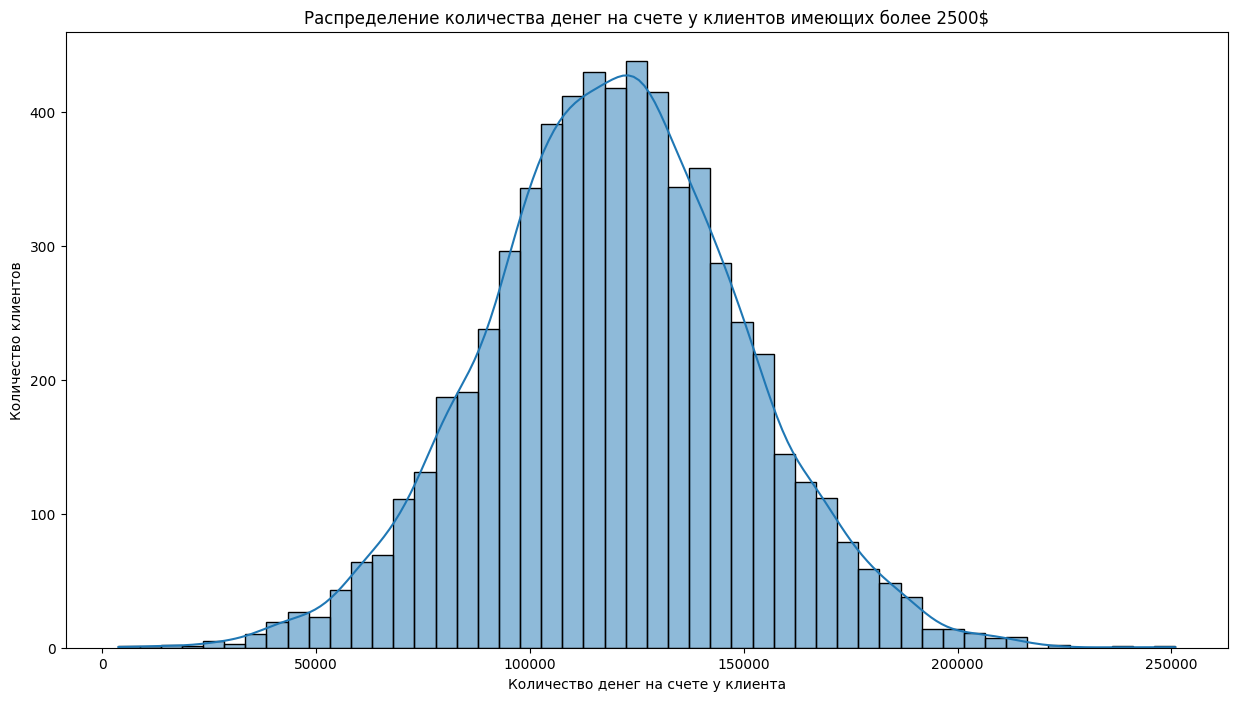

In [222]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(
    data=df,
    x=df_balance,
    bins=50,kde=True
)
axes.set_title("Распределение количества денег на счете у клиентов имеющих более 2500$")
axes.set_xlabel('Количество денег на счете у клиента')
axes.set_ylabel("Количество клиентов")
fig.show()

Исходя из видуализации видно, что форма нормального распределения пик около 12500$ на счетах. 

### Посмотреть на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов – с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/28791040.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


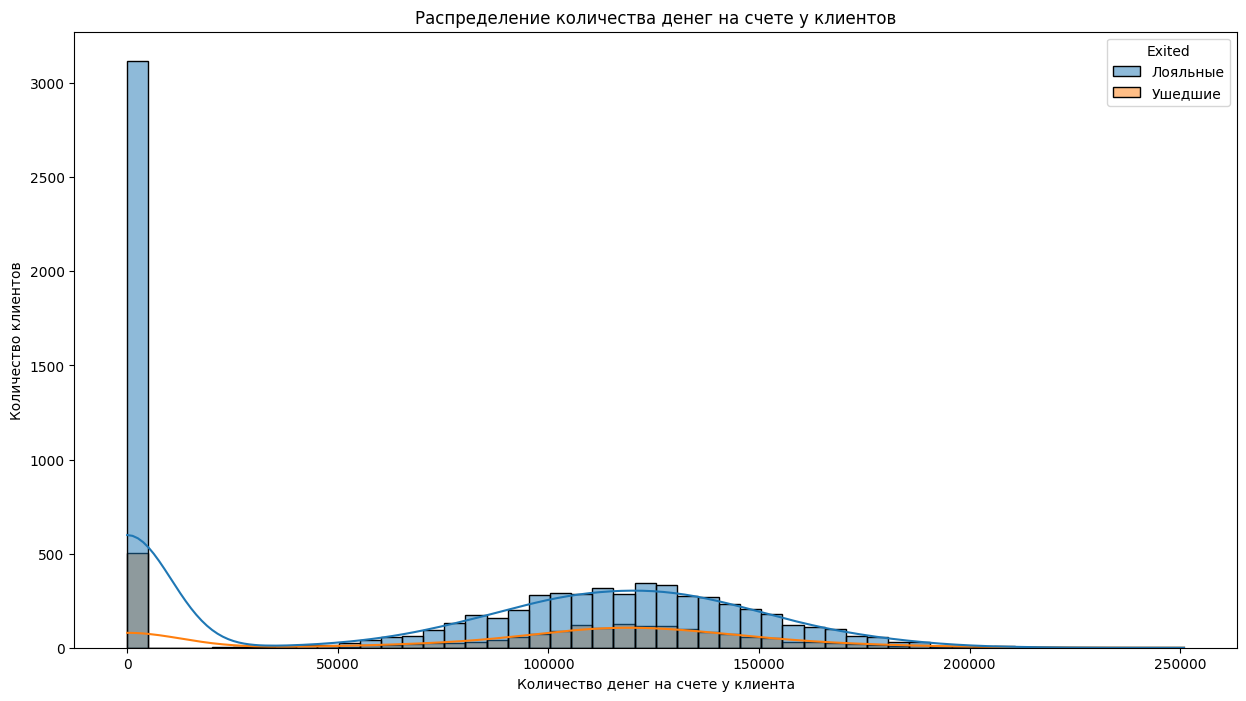

In [223]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(
    data=df,
    x=df.Balance,
    hue=df.Exited,
    bins=50,
    kde=True
)
axes.set_title("Распределение количества денег на счете у клиентов")
axes.set_xlabel('Количество денег на счете у клиента')
axes.set_ylabel("Количество клиентов")
fig.show()

Распределение весьма похоже по форме у лояльных и ушедших пользователей. Аномалия присутствует только в районе 0 у двух типов пользователей. Видно, что по каждой корзине баланса ушедших клиентов примерно в два раза меньше, чем лояльных. Но это не так для клиентов с вкладами до 2500$, в этой категории ушедших клиентов в 6 раз меньше, чем лояльных. Поэтому принято решение разделить их на две категории со вкладами до 2500$ и более 2500$. Это разделение возможно покажет нам различие в признаках, которые вляют на статус лояльности. 

In [224]:
big_balance=df[df.Balance>2500].reset_index(drop=True)
min_balance=df[df.Balance<=2500].reset_index(drop=True)
min_balance.head()
display(big_balance.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активные,112542.58,Лояльные
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивные,113931.57,Ушедшие
2,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активные,79084.10,Лояльные
3,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,Неактивные,149756.71,Ушедшие
4,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,Неактивные,119346.88,Ушедшие


Исходя из визуализации, баланс ушедших клиентов примерно в два раза меньше, чем у лояльных.

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/3889531664.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


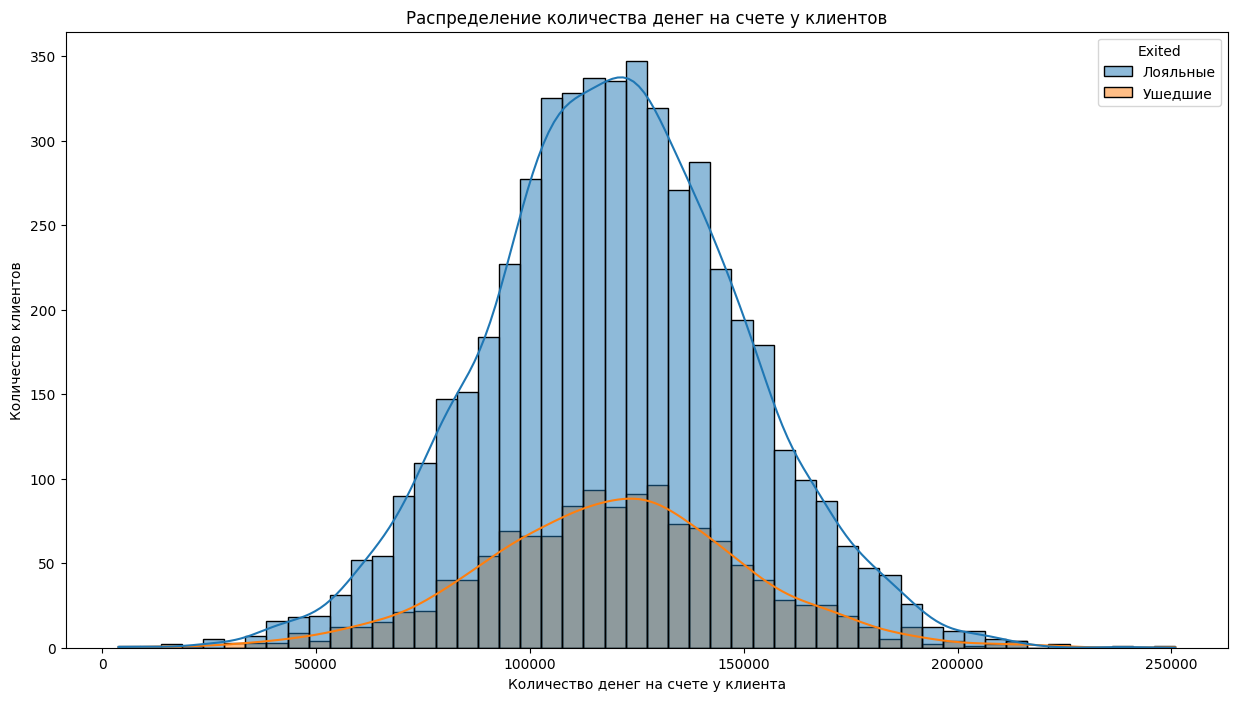

In [225]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.histplot(
    data=big_balance,
    x=big_balance.Balance,
    hue=df.Exited,
    bins=50,
    kde=True
)
axes.set_title("Распределение количества денег на счете у клиентов")
axes.set_xlabel('Количество денег на счете у клиента')
axes.set_ylabel("Количество клиентов")
fig.show()

In [226]:
print(min_balance.Balance.nunique())
print(min_balance.Balance.min())
print(min_balance.Balance.max())

1
0.0
0.0


Имеет смысл разделить всех клиентов на две большие группы и анализировать их признаки раздельно, скорее всего они пользуются разными родукьами и как следствие, причины ухода могут быть разные. 

### Посмотреть на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/2282438123.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


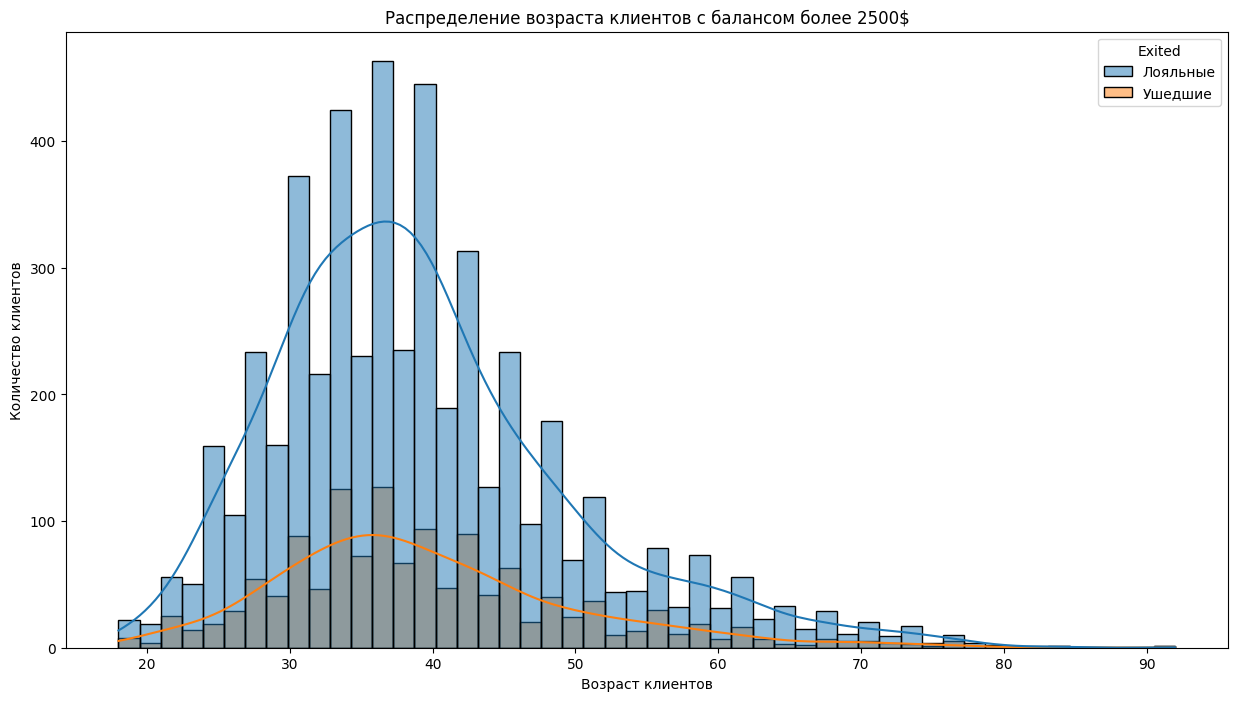

In [227]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.histplot(
    data=big_balance,
    x=big_balance.Age,
    hue=df.Exited,
    bins=50,
    kde=True
)
axes.set_title("Распределение возраста клиентов с балансом более 2500$")
axes.set_xlabel('Возраст клиентов')
axes.set_ylabel("Количество клиентов")
fig.show()

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/2623888569.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


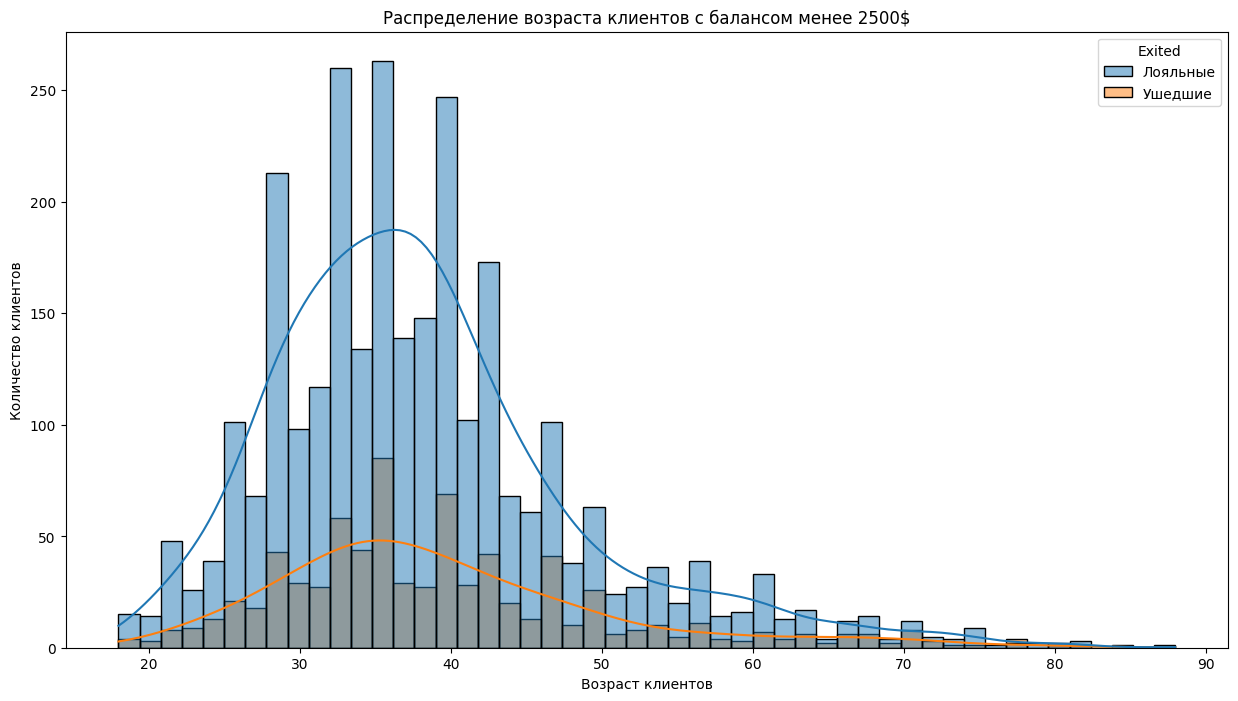

In [228]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.histplot(
    data=min_balance,
    x=min_balance.Age,
    hue=df.Exited,
    bins=50,
    kde=True
)
axes.set_title("Распределение возраста клиентов с балансом менее 2500$")
axes.set_xlabel('Возраст клиентов')
axes.set_ylabel("Количество клиентов")
fig.show()

В обеих группах видно, что повышенный отток приходится на возраст около 35 лет. 

### Построить график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавить расцветку по признаку оттока клиентов. Посмотреть, какая взаимосвязь между признаками. Если явной взаимосвязи нет - указать.

In [229]:
min_balance.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/1755675026.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


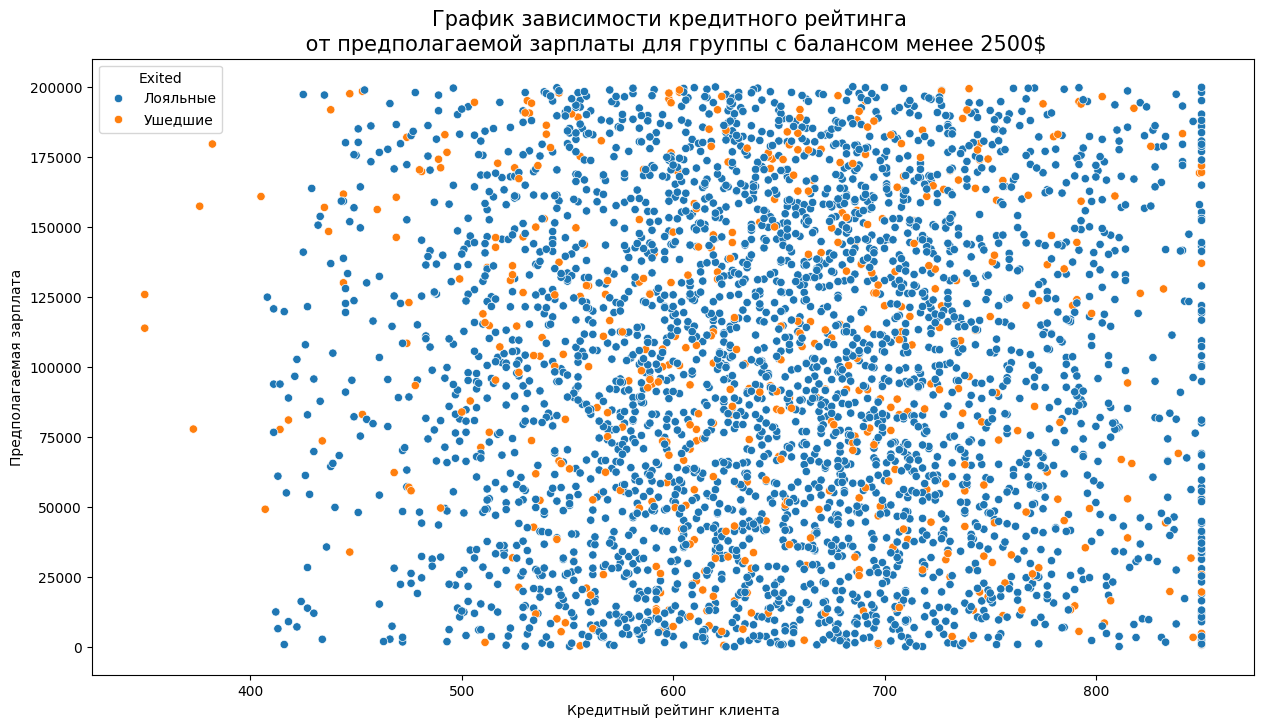

In [230]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.scatterplot(
    data=min_balance,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    ax=axes,
    sizes=(1,8)
)
axes.set_title("График зависимости кредитного рейтинга \n от предполагаемой зарплаты для группы с балансом менее 2500$",fontsize=15)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel("Предполагаемая зарплата")
fig.show()

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/2389433932.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


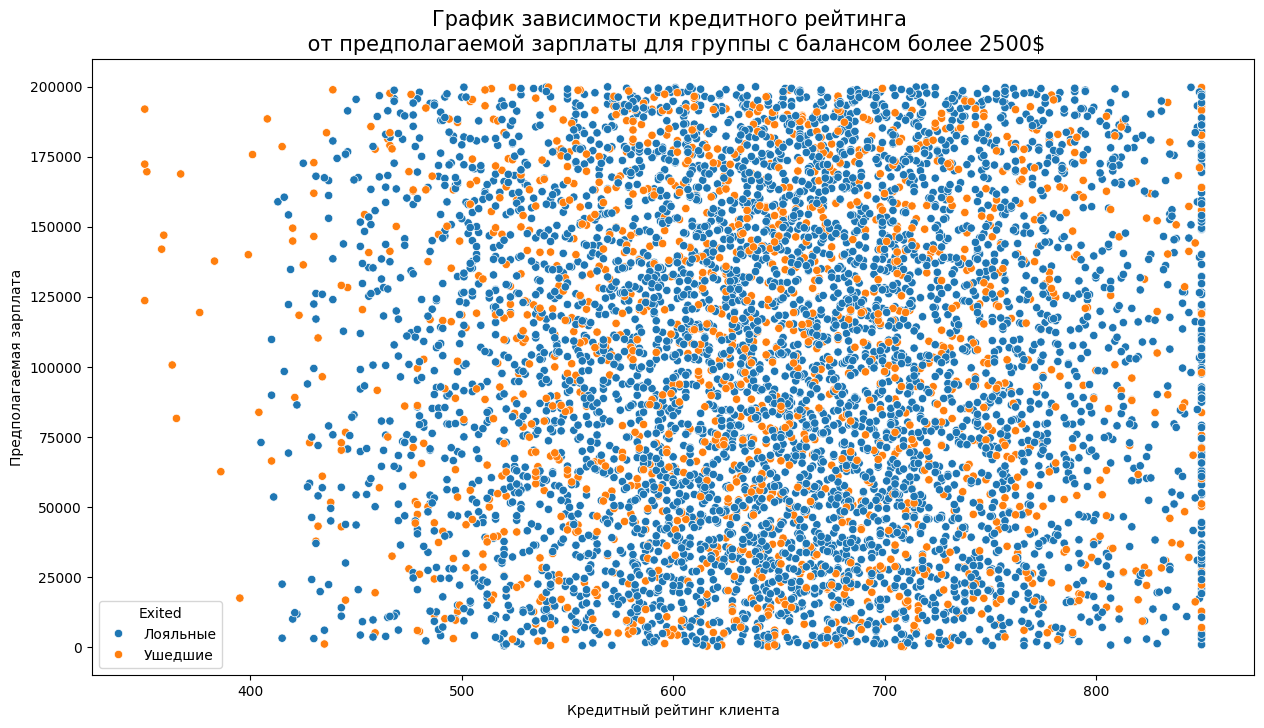

In [231]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.scatterplot(
    data=big_balance,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    ax=axes,
    sizes=(1,8)
)
axes.set_title("График зависимости кредитного рейтинга \n от предполагаемой зарплаты для группы с балансом более 2500$",fontsize=15)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel("Предполагаемая зарплата")
fig.show()

Из графика видно, что между предполагаемой зарплатой и кредитным рейтингом взаимосвязь отсутствует для обеих групп.

### Проанализировать, кто чаще уходит, мужчины или женщины. Построить график, который иллюстрирует это.


In [232]:
gender_df=df.groupby(by=['Gender','Exited'])['CustomerId'].count()

/var/folders/4p/61221tbs1lq96mmqjjf1m7m40000gn/T/ipykernel_97202/4292647625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_df=df.groupby(by=['Gender','Exited'])['CustomerId'].count()


In [233]:
gender_lst=list(gender_df)

In [234]:
gender_legend_lst=['Лояльные','Ушедшие','Лояльные','Ушедшие']

In [235]:
df_gend_sum=[]
df_gend_sum.append(gender_lst[0]+gender_lst[1])
df_gend_sum.append(gender_lst[2]+gender_lst[3])

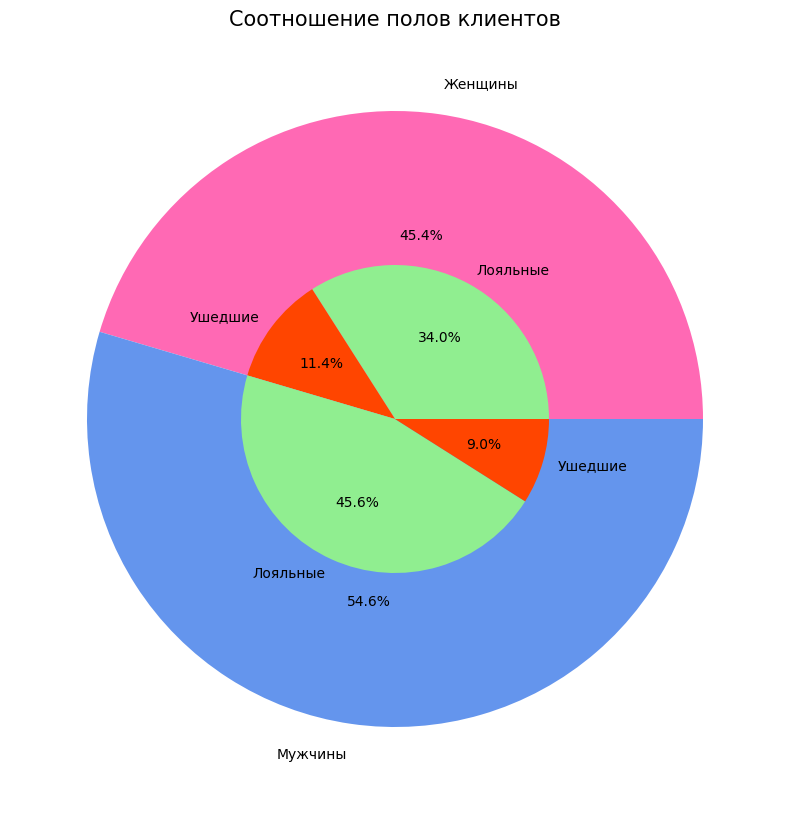

In [294]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.pie(df_gend_sum,
    radius=1,
    labels=['Женщины','Мужчины'],
    normalize=True,   
    colors=['#FF69B4','#6495ED'],
    autopct='%1.1f%%',
)
axes.pie(gender_lst,
    radius=0.5,
    labels=gender_legend_lst,
    colors=['#90EE90','#FF4500','#90EE90','#FF4500'],
    normalize=True,   
    autopct='%1.1f%%',
)
axes.set_title('Соотношение полов клиентов',fontsize=15);

В группе ушедших клиентов преобладают женщины, а в группе лояльных - мужчины.

### Посмотреть, как отток клиентов зависит от числа приобретённых у банка услуг. Для этого построить многоуровневую столбчатую диаграмму.

In [237]:
df['NumOfProducts']=df['NumOfProducts'].astype('category')

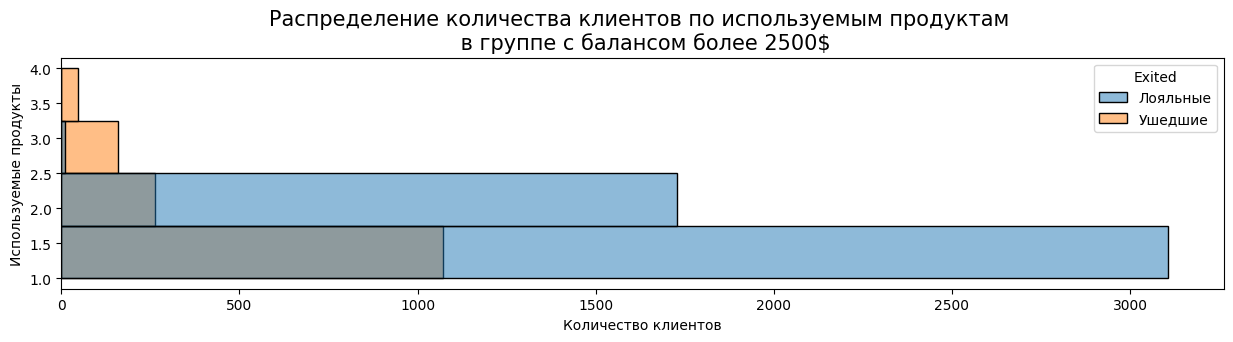

In [238]:
fig, axes = plt.subplots(figsize=(15, 3))
sns.histplot(
    data=big_balance,
    y=big_balance.NumOfProducts,
    hue=big_balance.Exited,
    bins=4,
)
axes.set_title("Распределение количества клиентов по используемым продуктам \n в группе с балансом более 2500$", fontsize=15)
axes.set_xlabel('Количество клиентов')
axes.set_ylabel('Используемые продукты');

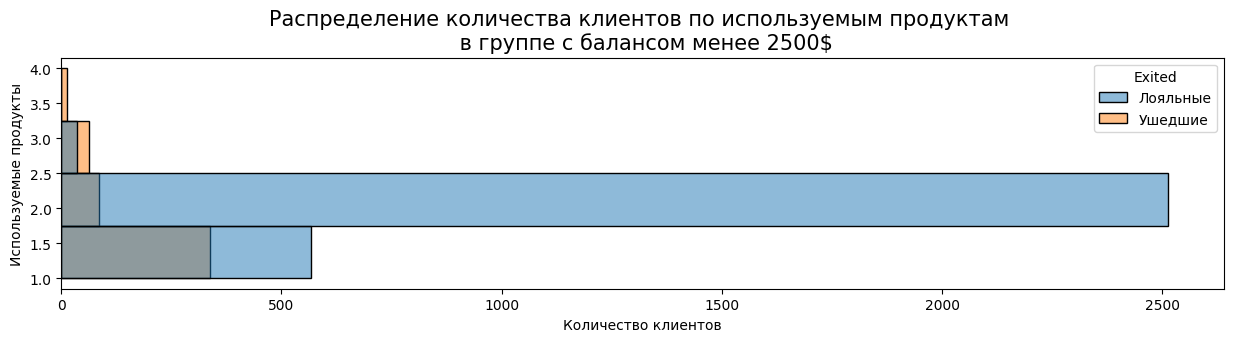

In [239]:
fig, axes = plt.subplots(figsize=(15, 3))
sns.histplot(
    data=min_balance,
    y=min_balance.NumOfProducts,
    hue=min_balance.Exited,
    bins=4,
)
axes.set_title("Распределение количества клиентов по используемым продуктам \n в группе с балансом менее 2500$", fontsize=15)
axes.set_xlabel('Количество клиентов')
axes.set_ylabel('Используемые продукты');

В обеих группах ушедшие клиенты в основном приобретали одну услугу у банка. В группе с балансом более 2500$ приобретали одну услугу больше лояльные пользователи, чем ушедшие. Но на два продукта из 4х приходилось больше ушедших клиентов. А в группе с балансом менее 2500$ - наиболее частый выбор пал на два вида услуг, причем количество лояльных пользователей примерно в 10 раз больше, чем ушедших.

### Посмотреть, как влияет наличие статуса активного клиента на отток клиентов. Построить диаграмму, иллюстрирующую это. На основе данных, проанализировать предложение банку, чтобы уменьшить отток клиентов среди неактивных. 

In [240]:
df['IsActiveMember']=df['IsActiveMember'].astype('category')

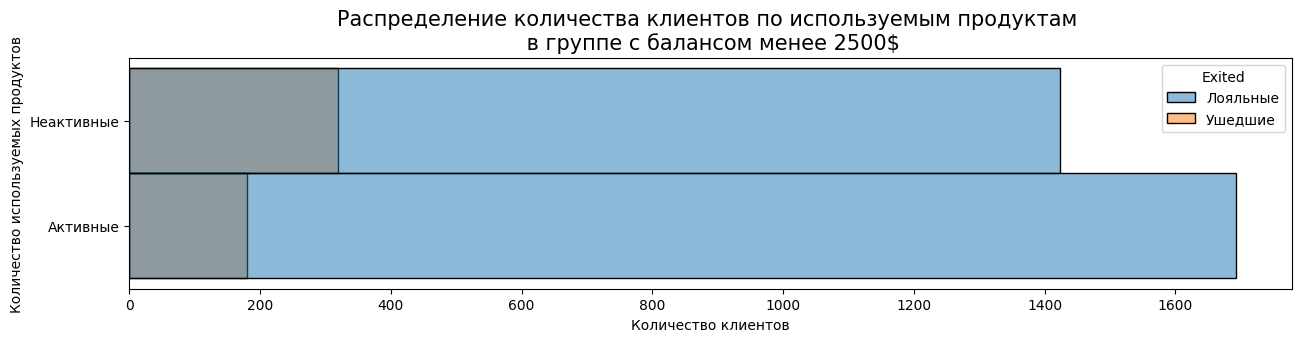

In [242]:
fig, axes = plt.subplots(figsize=(15, 3))
sns.histplot(
    data=min_balance,
    y=min_balance.IsActiveMember,
    hue=min_balance.Exited,
    bins=2,
)
axes.set_title("Распределение количества клиентов по используемым продуктам \n в группе с балансом менее 2500$", fontsize=15)
axes.set_xlabel('Количество клиентов')
axes.set_ylabel('Количество используемых продуктов');

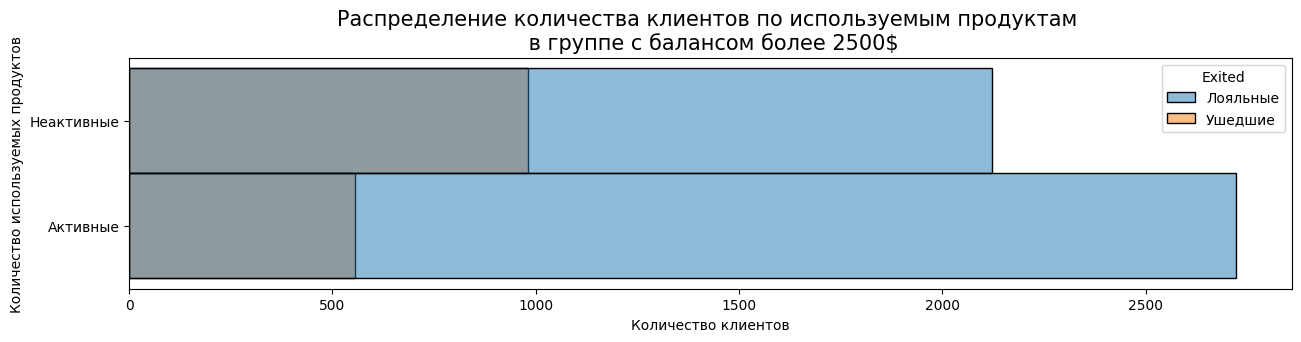

In [243]:
fig, axes = plt.subplots(figsize=(15, 3))
sns.histplot(
    data=big_balance,
    y=big_balance.IsActiveMember,
    hue=big_balance.Exited,
    bins=2,
)
axes.set_title("Распределение количества клиентов по используемым продуктам \n в группе с балансом более 2500$", fontsize=15)
axes.set_xlabel('Количество клиентов')
axes.set_ylabel('Количество используемых продуктов');

Отток неактивных клиентов в обеих категориях больше, чем отток активных клиентов. 
Банку следует обратить внимание на отток клиентов в разрезе их активности на группу с балансом более 2500$ на счете, так как там соотношение оттока и лояльности выше, чем в группе с балансом менее 2500$.

### Посмотреть, в какой стране доля ушедших клиентов больше. Построить тепловую картограмму, которая покажет это соотношение на карте мира. Предположить, с чем это может быть связано.

In [ ]:
(tp+tn)/total

0.5714285714285714

Перегрузим таблицы чтобы обнулить категории и работать с числовыми значениями.

In [245]:
df = pd.read_csv('/Users/ulabakulina/Desktop/piton/churn.csv')
big_balance=df[df.Balance>2500].reset_index(drop=True)
min_balance=df[df.Balance<=2500].reset_index(drop=True)
big_balance.drop('RowNumber',inplace=True,axis=1)
min_balance.drop('RowNumber',inplace=True,axis=1)
min_balance.head()
display(big_balance.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
3,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
4,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [248]:
min_balance.Geography.value_counts(normalize=True)

Geography
France    0.66851
Spain     0.33149
Name: proportion, dtype: float64

In [256]:
fig = px.choropleth(
    data_frame=big_balance.groupby('Geography')['Exited'].mean(), 
    locations=big_balance.groupby('Geography')['Exited'].mean().index, 
    locationmode = "country names",
    color="Exited", 
    range_color=[0, 1], 
    title='Распределение оттока клиентов с балансом более 2500$',
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)
fig.show()

In [257]:
fig = px.choropleth(
    data_frame=min_balance.groupby('Geography')['Exited'].mean(), 
    locations=min_balance.groupby('Geography')['Exited'].mean().index, 
    locationmode = "country names",
    color="Exited", 
    range_color=[0, 1], 
    title='Распределение оттока клиентов с балансом менее 2500$',
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)
fig.show()

Наибольший отток клиентов зафиксирован в Германии в группе с балансом на счете более 2500$.Возможно это может быть связано с тем, что в Германии клиентами банка являются более возрастные категории людей и анализ выше показал, что отток в более возрастных группах выше, соответсвенно эти два фактора могут влиять друг на друга.

### Перевести числовой признак CreditScore в категориальный, с помощью функции get_credit_score_cat(). Применить её к столбцу CreditScore и создать новый признак CreditScoreCat — категории кредитного рейтинга.


Построить сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы построить тепловую карту с аннотацией. Найти на тепловой карте категории клиентов, которые уходят чаще всего.

In [258]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [259]:
big_balance['CreditScoreCat']=big_balance['CreditScore'].apply(get_credit_score_cat)
min_balance['CreditScoreCat']=min_balance['CreditScore'].apply(get_credit_score_cat)
display(big_balance.head())
display(min_balance.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
2,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent
3,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Fair
4,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Very_Poor


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,Fair
1,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,93826.63,0,Good
2,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0,Excellent
3,15737173,Andrews,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,Very_Poor
4,15632264,Kay,476,France,Female,34,10,0.0,2,1,0,26260.98,0,Very_Poor


In [262]:
tep_big=big_balance.groupby(by=['CreditScoreCat','Tenure'])['Exited'].mean().unstack()

In [263]:
tep_min=min_balance.groupby(by=['CreditScoreCat','Tenure'])['Exited'].mean().unstack()

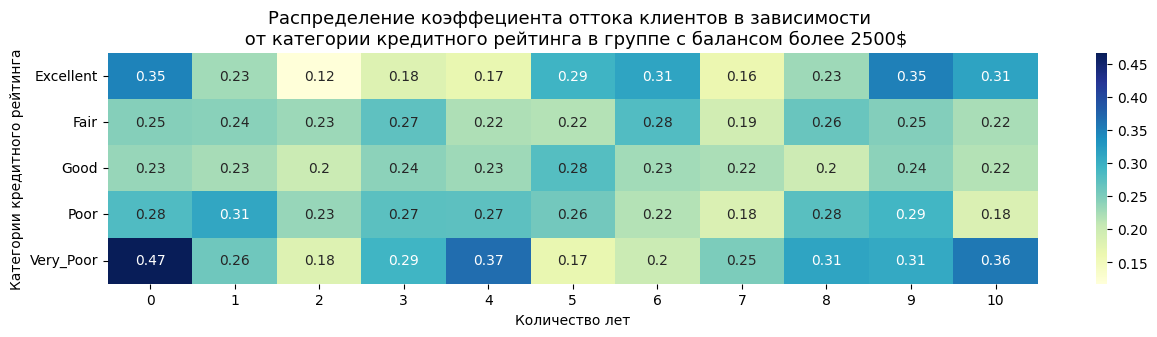

In [271]:
fig, axes = plt.subplots(figsize=(15, 3))
axes=sns.heatmap(data=tep_big, annot=True, cmap='YlGnBu')
axes.set_title("Распределение коэффециента оттока клиентов в зависимости \n от категории кредитного рейтинга в группе с балансом более 2500$", fontsize=13)
axes.set_xlabel('Количество лет')
axes.set_ylabel('Категории кредитного рейтинга');


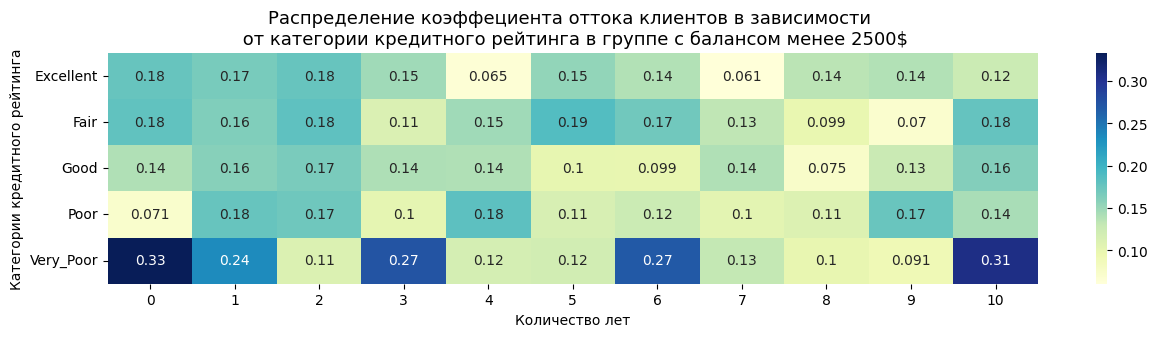

In [273]:
fig, axes = plt.subplots(figsize=(15, 3))
axes=sns.heatmap(data=tep_min, annot=True, cmap='YlGnBu')
axes.set_title("Распределение коэффециента оттока клиентов в зависимости \n от категории кредитного рейтинга в группе с балансом менее 2500$", fontsize=13)
axes.set_xlabel('Количество лет')
axes.set_ylabel('Категории кредитного рейтинга');

Исходя из визуализации видим, что наибольший отток клиентов наблюдается в обеих группах у клиентов с низким кредитным рейтингом. Меньший отток наблюдается в группе с балансом на счете менее 2500$. В остальных категориях нет значимых различий по времени пользования банковскими услугами. 